# 背景概述

$\quad$1865年, 俄国化学家[门捷列夫(Mendeleev)](https://en.wikipedia.org/wiki/Dmitri_Mendeleev)根据相对原子质量的增长关系所呈现的周期性, 发表了最早版本的[元素周期表(periodic table)](https://en.wikipedia.org/wiki/Periodic_table). 在本次上机作业中, 我们将根据若干元素的原子参数数据, 尝试挖掘这些化学元素中的内禀规律, 并作一个简单的聚类分析.
- 参考文献: [J. Chem. Educ. 2020, 97, 6, 1666–1676](https://pubs.acs.org/doi/10.1021/acs.jchemed.9b00924).

$\quad$由于t-SNE算法的版本更新问题, 可能会输出一些警告(warning). 出于简化, 我们在本次作业中忽略这些警告. 请运行下面的代码块.

In [1]:
import warnings
warnings.simplefilter("ignore")

# 数据读取与清洗

$\quad$请运行下面的代码块, 读入`chem_elements.csv`数据集(已丢弃所有含缺失值的元素).

In [2]:
import pandas as pd
raw_data = pd.read_csv("/data/MLInChem_v2/chem_elements.csv", sep=";").dropna()
raw_data

,Symbol,Name,AtomicMass,ElectronConfiguration,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,OxidationStates,StandardState,MeltingPoint,BoilingPoint,Density,GroupBlock,"YearDiscovered""","""AtomicNumber"
0,H,Hydrogen,1.008,1s1,2.20,120,13.598,0.754,+1-1,Gas,13.810,20.28,0.000090,Nonmetal,"1766""","""1"
1,Li,Lithium,7.000,[He]2s1,0.98,182,5.392,0.618,1,Solid,453.650,1615.00,0.534000,Alkalimetal,"1817""","""3"
3,B,Boron,10.810,[He]2s22p1,2.04,192,8.298,0.277,3,Solid,2348.000,4273.00,2.370000,Metalloid,"1808""","""5"
4,C,Carbon,12.011,[He]2s22p2,2.55,170,11.260,1.263,+4+2-4,Solid,3823.000,4098.00,2.267000,Nonmetal,"Ancient""","""6"
6,O,Oxygen,15.999,[He]2s22p4,3.44,152,13.618,1.461,-2,Gas,54.360,90.20,0.001429,Nonmetal,"1774""","""8"
7,F,Fluorine,18.998,[He]2s22p5,3.98,135,17.423,3.339,-1,Gas,53.530,85.03,0.001696,Halogen,"1670""","""9"
8,Na,Sodium,22.989,[Ne]3s1,0.93,227,5.139,0.548,1,Solid,370.950,1156.00,0.970000,Alkalimetal,"1807""","""11"
10,Al,Aluminum,26.981,[Ne]3s23p1,1.61,184,5.986,0.441,3,Solid,933.437,2792.00,2.700000,Post-transitionmetal,"Ancient""","""13"
11,Si,Silicon,28.085,[Ne]3s23p2,1.90,210,8.152,1.385,+4+2-4,Solid,1687.000,3538.00,2.329000,Metalloid,"1854""","""14"
12,P,Phosphorus,30.973,[Ne]3s23p3,2.19,180,10.487,0.746,+5+3-3,Solid,317.300,553.65,1.820000,Nonmetal,"1669""","""15"


$\quad$**任务1**: 完成函数`preprocess_chem_elements`的编写, 输入:
- `raw_data`: 原始数据(缺失值已丢弃, 无需额外处理), 为一个`pd.DataFrame`对象;
- `feature_cols`: 一个列表, 用于下游降维/聚类任务的特征列名;
- `idx_col`: 字符串, 用作新的数据表的列名.

要求: (1)根据给定的`idx_col`重新设置表格索引, 并将原索引丢弃; (2) 挑选出原始数据中的`feature_cols`列、并作均值-方差归一化. 最终返回一个处理好的、只含`feature_cols`列的(归一化)数据表, 索引按`idx_col`确定.

### 提示
- 索引重置方法可以参考[`df.reset_index`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html#pandas-dataframe-reset-index)方法;
- 归一化可以参考[`sklearn.preprocessing.StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn-preprocessing-standardscaler)模块;
- 可以复习前2次上机作业对于`pandas`库的介绍.

In [3]:
from typing import List
from sklearn.preprocessing import StandardScaler

def preprocess_chem_elements(
    raw_data: pd.DataFrame, feature_cols: List[str],
    idx_col: str="Symbol"
) -> pd.DataFrame:
    ### BEGIN YOUR SOLUTION ###
    new_data = raw_data[feature_cols]
    new_data.index = raw_data[idx_col]
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(new_data)
    
    new_data = pd.DataFrame(scaled_data, columns=feature_cols, index=new_data.index)
    
    print(new_data.index)
    return new_data
    ### END YOUR SOLUTION ###

$\quad$完成任务1后, 请运行下面的代码块, 给出处理好的数据表`X`. 我们所选取的特征包括:
- 原子质量`AtomicMass`, 单位u;
- 原子半径`AtomicRadius`, 采取[van der Waals半径](https://en.wikipedia.org/wiki/Van_der_Waals_radius), 单位pm;
- 电离能`IonizationEnery`, 单位eV;
- 电子亲合能`ElectronAffinity`, 单位eV;
- 电负性`Electronegativity`, 采取[Pauling标度](https://en.wikipedia.org/wiki/Electronegativity#Pauling_electronegativity);
- 熔点`MeltingPoint`, 单位K;
- 沸点`BoilingPoint`, 单位K;
- 单质密度`Density`, 单位g/mL.

In [4]:
feature_cols = [
    "AtomicMass",
    "AtomicRadius",
    "IonizationEnergy",
    "ElectronAffinity",
    "Electronegativity",
    "MeltingPoint",
    "BoilingPoint",
    "Density"
]
X = preprocess_chem_elements(
    raw_data,
    feature_cols=feature_cols
)
X

Index(['H', 'Li', 'B', 'C', 'O', 'F', 'Na', 'Al', 'Si', 'P', 'S', 'Cl', 'K',
       'Sc', 'Ti', 'V', 'Cr', 'Fe', 'Co', 'Ni', 'Cu', 'Ga', 'Ge', 'As', 'Se',
       'Br', 'Rb', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'In',
       'Sn', 'Sb', 'Te', 'I', 'Cs', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au',
       'Tl', 'Pb', 'Bi', 'Po'],
      dtype='object', name='Symbol')


,AtomicMass,AtomicRadius,IonizationEnergy,ElectronAffinity,Electronegativity,MeltingPoint,BoilingPoint,Density
Symbol,,,,,,,,
H,-1.484785,-2.243779,2.194844,-0.369949,0.341005,-1.303907,-1.613774,-1.241627
Li,-1.388654,-0.464566,-1.127539,-0.527923,-1.650809,-0.892769,-0.650228,-1.154716
B,-1.327530,-0.177596,0.049020,-0.924018,0.079783,0.877964,0.955764,-0.855850
C,-1.308262,-0.808930,1.248252,0.221290,0.912427,2.256712,0.850027,-0.872616
O,-1.244282,-1.325476,2.202941,0.451281,2.365472,-1.266003,-1.571528,-1.241409
F,-1.196168,-1.813325,3.743481,2.632710,3.247094,-1.266779,-1.574651,-1.241365
Na,-1.132140,0.826798,-1.229972,-0.609233,-1.732441,-0.970072,-0.927560,-1.083744
Al,-1.068096,-0.407172,-0.887045,-0.733521,-0.622249,-0.444291,0.060928,-0.802132
Si,-1.050384,0.338949,-0.010091,0.363002,-0.148785,0.260098,0.511669,-0.862524


# 数据的主元分析

$\quad$在本节, 我们以PCA模型进行数据降维, 并对前两个主元作相应的可视化分析.

$\quad$**任务2**: 完成函数`get_pc_info`的编写. 输入数据`X`和PCA组分数`n_components`, 对数据`X`作PCA模型的训练与变换, 并提取相应的信息. 返回一个三元组:
- 降维后的数据`X_reduced`, 形状应为`(n_samples, n_components)`;
- 各个主元的方差解释比例`explained_variance_ratio`;
- 主元变换矩阵`components`, 形状为`(n_components, n_features)`.

In [5]:
from typing import Tuple
import numpy as np
from sklearn.decomposition import PCA

def get_pc_info(
    X: pd.DataFrame, n_components: int=2
) -> Tuple[np.array, np.array, np.array]:
    ### BEGIN YOUR SOLUTION ###
    pca = PCA(n_components = n_components)
    X_reduced = pca.fit_transform(X)
    
    explained_variance_ratio = pca.explained_variance_ratio_
    
    components = pca.components_
    
    return X_reduced, explained_variance_ratio, components
    ### END YOUR SOLUTION ###

$\quad$完成任务2后, 请运行下面的代码进行检查.

In [6]:
X_reduced, explained_variance_ratio, components = get_pc_info(X)
X_reduced.shape, explained_variance_ratio.shape, components.shape

((53, 2), (2,), (2, 8))

$\quad$**任务3**: 运行下面两个代码块, 根据给定的函数`plot_pc1_pc2`完成可视化分析, 在对应的答题区回答下面的问题:

- 观察左图, 这是二维隐空间中样本的散点分布. 回答: 四个象限的元素各自以哪一类为主? 请作出分配: (a) 过渡金属元素; (b) 主族金属元素; (c) 主族非金属元素; (d) 卤素.
- 观察右图, 这是将变换矩阵的每一列(作为二维向量)画成矢量给出的**载荷图**(loading plot). 两个向量朝向相近表明它们之间存在某种内禀共性. 请回答:
  - 第三象限聚集的那些原始特征大多与元素的什么性质有关? 请作出选择: (a) 原子聚集行为; (b) 电子吸引能力.
  - 第四象限聚集的那些原始特征大多与元素的什么性质有关? 请作出选择: (a) 原子聚集行为; (b) 电子吸引能力.
  - 第二象限只分布有一个原始特征, 它与第四象限的那些特征具有较强的“负相关性”, 请作出简单解释.

In [7]:
from matplotlib import pyplot as plt

def plot_pc1_pc2(X_reduced, explained_variance_ratio, components, idxs, feature_cols):
    fig, (ax1, ax2) = plt.subplots(1, 2, layout="constrained", figsize=(10, 4))
    # sample plot
    ax1.scatter(X_reduced[:, 0], X_reduced[:, 1])
    ax1.set_aspect('equal', adjustable='box')
    ax1.axhline(y=0, linestyle="--")
    ax1.axvline(x=0, linestyle="--")
    for i, idx in enumerate(idxs):
        ax1.annotate(idx, (X_reduced[i, 0], X_reduced[i, 1]))
    # loading plot
    ax2.add_patch(plt.Circle((0, 0), 1.0, fill=False, edgecolor="red", linestyle="--"))
    n_features = components.shape[1]
    for i in range(n_features):
        ax2.arrow(0, 0, components[0, i], components[1, i], head_width=0.05)
        ax2.annotate(feature_cols[i], (components[0, i] - 0.25, components[1, i]), fontsize=8)
    ax2.axhline(y=0, linestyle="--")
    ax2.axvline(x=0, linestyle="--")
    ax2.set_aspect('equal', adjustable='box')
    # title, axes, and annotation
    ratio1, ratio2 = explained_variance_ratio
    ax1.set_title("Samples in latent space")
    ax1.set_xlabel(f"PC1({ratio1 * 100:.2f}%)")
    ax1.set_ylabel(f"PC2({ratio2 * 100:.2f}%)")
    ax2.set_title("Loading plot")
    ax2.set_xlabel(f"PC1({ratio1 * 100:.2f}%)")
    ax2.set_ylabel(f"PC2({ratio2 * 100:.2f}%)")
    plt.show()

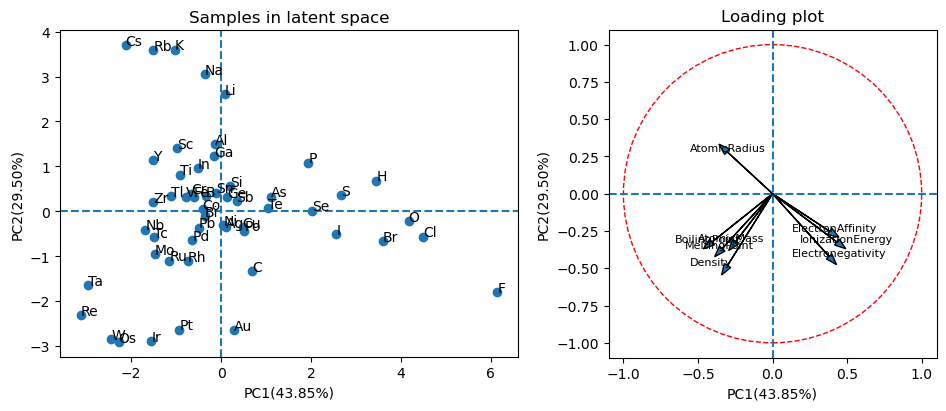

In [8]:
plot_pc1_pc2(X_reduced, explained_variance_ratio, components, X.index, feature_cols)

### 任务3答题区(另起一行时请记得加注释符号#) ###
### BEGIN YOUR SOLUTION ###
# 1. 第I象限：  (c) 主族非金属元素
#    第II象限： (b) 主族金属元素
#    第III象限：(a) 过渡金属元素
#    第IV象限： (d) 卤素
# 2. 第III象限：(a) 原子聚集行为 
#    第IV象限： (b) 电子吸引能力
#    因为原子半径越大，电子吸引能力越弱，越倾向于金属（金属性）；而原子半径越小，电子吸引能力越强，越倾向于卤素（非金属性）。
#    因此，在金属-卤素的倾向性上，原子半径和电子吸引能力起相反的作用，故具有“负相关性”。
### END YOUR SOLUTION

# 隐空间上的聚类分析

$\quad$我们在降维后的隐空间上进行k-means聚类, 并对聚类结果进行评估. 具体试验的降维算法将包括PCA、Isomap与t-SNE, 均控制为降到3维. 由于聚类分析是非监督的, 它没有类似“准确率”这样的评估指标, 本节我们采取的指标有两个:
- (调整的)随机指数相似性, 以[`adjusted_rand_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score)方法实现. 这一指标适合本例的情形, 即存在一组真实标签作为对照. 该指标大致可以理解为真实标签与预测标签在“分配结构”上的相似性.
- **轮廓系数**(silhouette coefficient), 以[`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn-metrics-silhouette-score)方法实现. 该指标大致可以理解为簇间轮廓的清晰程度(的样本平均), 计算公式为:
  $$
  S := \frac{1}{N}\sum_{n=1}^N{\frac{b_n - a_n}{\max{\{a_n, b_n\}}}},
  $$
  其中, $n = 1, \dots, N$遍历所有数据样本, $a_n, b_n$分别表示样本$n$到点$A_n, B_n$的距离. 其中, 点$A_n$为样本$n$所在的簇中心, 点$B_n$为样本$n$所不在的、最近邻的簇中心.

**任务4**: 完成函数`cluster_on_latent_space`的编写, 输入:
- `X`, 待降维的数据;
- `reduction_model`, 用于降维的模型;
- `y_true`, 真实标签, 本例取为原始表格中的`GroupBlock`一列, 代表元素所属的类别(例如: 碱金属、过渡金属、非金属, 等等);
- `n_clusters`: 簇的个数. 为了与真实标签保持统一, 本例默认值取为7, 无需修改.
- `random_state`: 用于运行k-means算法的随机数种子. 默认取42, 无需修改.

要求对给定的数据`X`利用`reduction_model`进行降维, 再以k-means方法进行聚类分析, 并对聚类结果进行评估. 返回一个二元组: 随机指数相似性、轮廓系数.

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

def cluster_on_latent_space(
    X, reduction_model, y_true,
    n_clusters: int=7, random_state: int=42
) -> Tuple[float, float]:
    ### BEGIN YOUR SOLUTION ###
    X_reduced = reduction_model.fit_transform(X)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    y_pred = kmeans.fit_predict(X_reduced)
    
    rand_index = adjusted_rand_score(y_true, y_pred)
    silhouette_coeff = silhouette_score(X_reduced, y_pred)

    return rand_index, silhouette_coeff
    ### END YOUR SOLUTION ###

$\quad$完成任务3后, 你可以运行下面的代码块, 对PCA、Isomap和t-SNE的聚类结果进行综合评估.

In [10]:
from sklearn.manifold import Isomap, TSNE
from sklearn.preprocessing import LabelEncoder

metrics = pd.DataFrame(columns=["rand_acc", "silhouette_coeff"], index=["PCA", "Isomap", "t-SNE"])

y_true = LabelEncoder().fit_transform(raw_data["GroupBlock"])
n_components = 3
for reduction_model, name in (
    (PCA(n_components=n_components), "PCA"),
    (Isomap(n_components=n_components), "Isomap"),
    (TSNE(n_components=n_components, init="pca", learning_rate="auto", perplexity=30), "t-SNE")
):
    rand_acc, silhouette_coeff = cluster_on_latent_space(X, reduction_model, y_true)
    metrics.loc[name, "rand_acc"] = rand_acc
    metrics.loc[name, "silhouette_coeff"] = silhouette_coeff

metrics

,rand_acc,silhouette_coeff
PCA,0.238068,0.3016
Isomap,0.274553,0.373478
t-SNE,0.080365,0.207034
